In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

In [133]:
data = pd.read_csv("points.csv")
data

,x,y,z,target
0,20.604735,19.474115,19.452474,3
1,23.524815,8.490756,27.876346,3
2,24.696120,11.931028,-8.361890,3
3,23.516354,17.183918,3.555375,3
4,21.399873,13.812704,3.942708,3
...,...,...,...,...
617,26.497367,26.029564,4.815220,2
618,23.891117,24.658145,-0.091179,2
619,25.079437,26.400046,3.058729,2
620,27.184971,25.245569,12.261928,2


In [134]:

print(f'The table has {data.shape[0]} rows')
print(f'The tables columns are: {data.columns}')

The table has 622 rows
The tables columns are: Index(['x', 'y', 'z', 'target'], dtype='object')


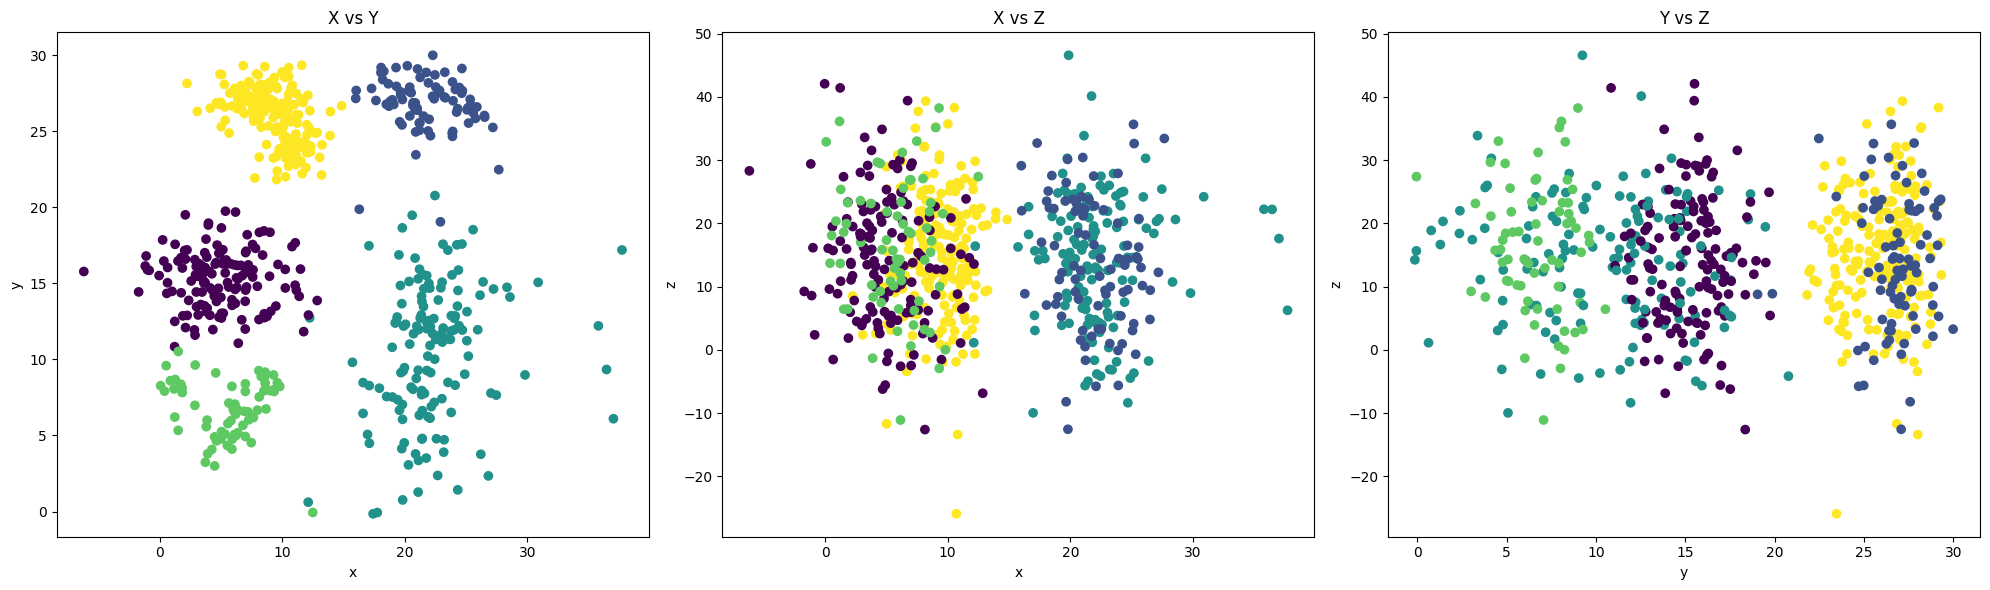

In [135]:
def plot_scatter(x, y, labels, title, ax):
    scatter = ax.scatter(data[x], data[y], c=labels)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return scatter

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
scatter1 = plot_scatter('x', 'y', data['target'], 'X vs Y', axs[0])
scatter2 = plot_scatter('x', 'z', data['target'], 'X vs Z', axs[1])
scatter3 = plot_scatter('y', 'z', data['target'], 'Y vs Z', axs[2])
plt.tight_layout()
plt.show()

In [136]:
X = data[['x', 'y', 'z']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

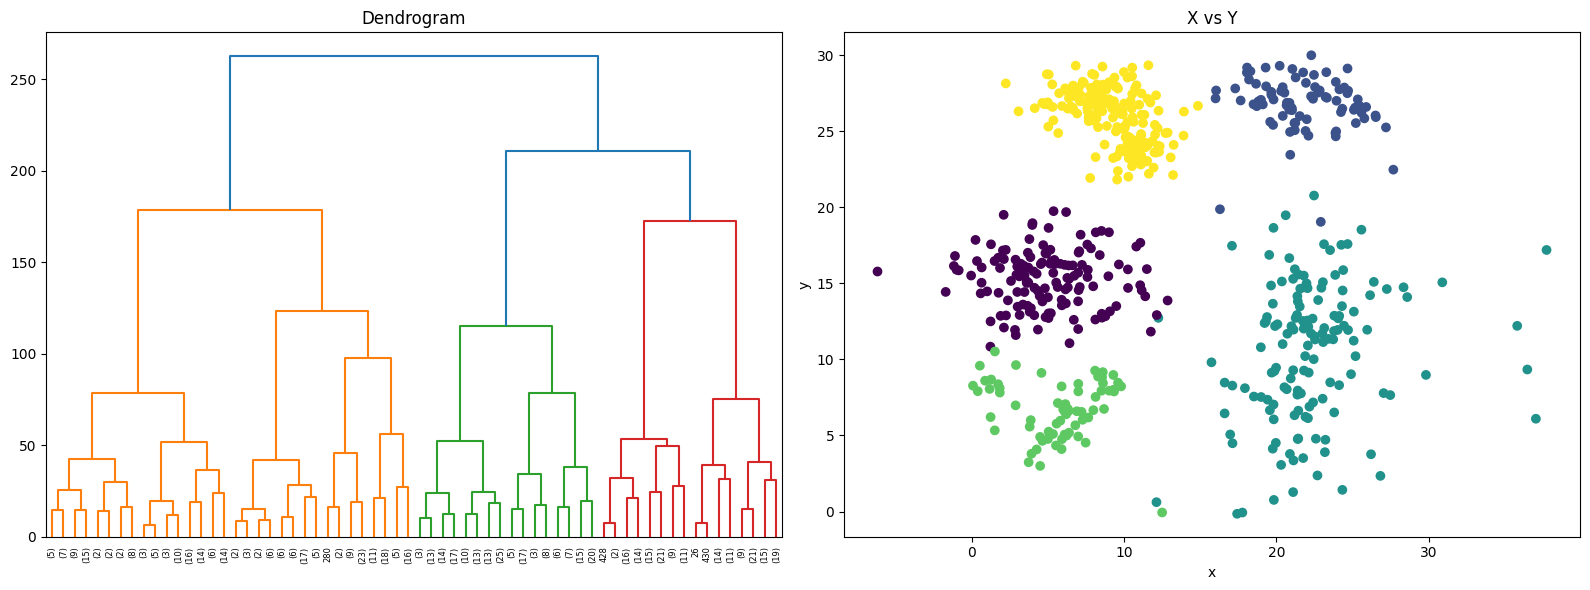

In [137]:
def plot_dendrogram(model, ax, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, ax=ax, **kwargs)


model = AgglomerativeClustering(n_clusters=5, compute_distances=True)
model = model.fit(X)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))


plot_dendrogram(model, axs[0], truncate_mode='level', p=5)
axs[0].set_title('Dendrogram')


scatter1 = plot_scatter('x', 'y', data['target'], 'X vs Y', axs[1])

plt.tight_layout()
plt.show()

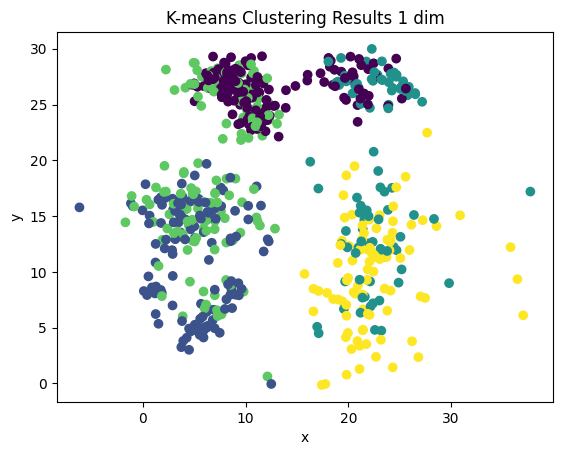

In [138]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

fig, ax = plt.subplots(1, 1)
plot_scatter('x', 'y', kmeans.labels_, 'K-means Clustering Results 1 dim', ax)
plt.show()

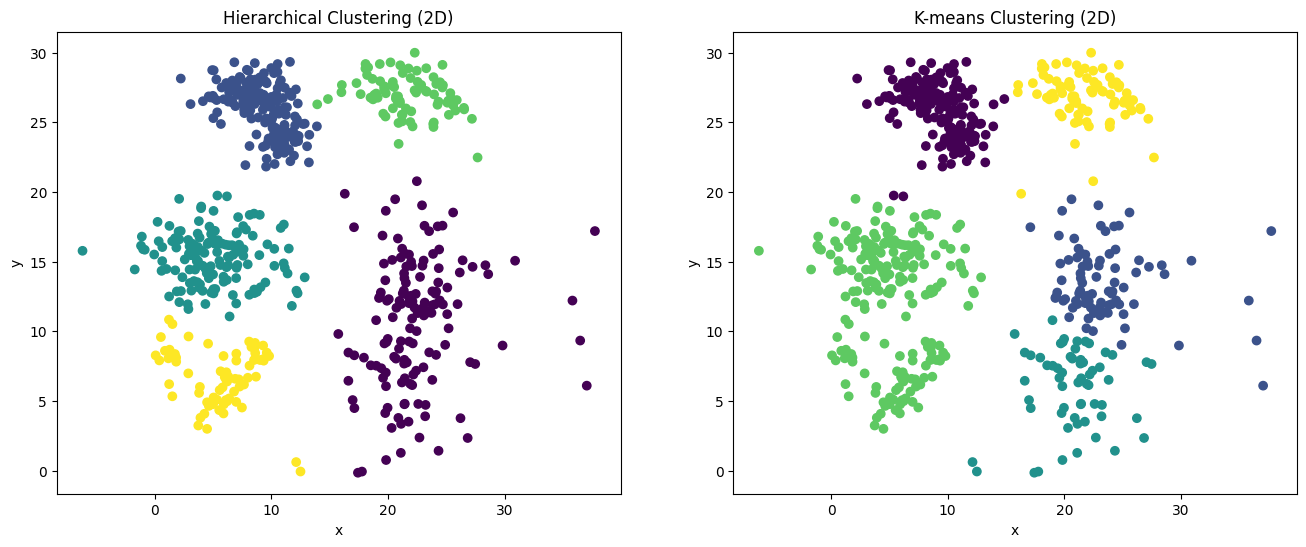

In [139]:
# Assuming 'x' and 'y' are the most informative dimensions
X_2d = data[['x', 'y']]

# Hierarchical clustering
model_2d = AgglomerativeClustering(n_clusters=5)
model_2d.fit(X_2d)

# K-means clustering
kmeans_2d = KMeans(n_clusters=5, random_state=42)
kmeans_2d.fit(X_2d)

# Plot results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plot_scatter('x', 'y', model_2d.labels_, 'Hierarchical Clustering (2D)', ax[0])
plot_scatter('x', 'y', kmeans_2d.labels_, 'K-means Clustering (2D)', ax[1])

In [140]:
rs_kmeans = adjusted_rand_score(y, kmeans.labels_)
rs_kmeans_2d = adjusted_rand_score(y, kmeans_2d.labels_)
print(f"Adjusted Rand Index (all variables): {rs_kmeans:.4f}")
print(f"Adjusted Rand Index (2 variables): {rs_kmeans_2d:.4f}")

Adjusted Rand Index (all variables): 0.4192
Adjusted Rand Index (2 variables): 0.7806
